# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Diego Antonio Navarro Ramirez

- ID: A01645389

- My carreer: ITC 4to Semestre


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [3]:
Ruta = ""
url = Ruta + "A01645389_X.csv"
data = pd.read_csv(url)

data

Unnamed: 0         x1        x2        x3        x4        x5         x6  \
0             0   5.633670 -5.391909 -6.241326 -0.229762 -8.260464  -4.536947   
1             1  -4.446400 -0.721278  6.603646 -5.714566  5.806021   6.049225   
2             2  -6.839525  3.044584  0.696548  6.211317  6.389792 -12.908313   
3             3   9.526248 -0.146916  1.963917 -0.120648 -5.852763  -4.994799   
4             4   9.255847 -3.630274  3.852253 -0.321279 -5.246166  -6.001134   
..          ...        ...       ...       ...       ...       ...        ...   
943         943  -2.771917 -4.961003  5.305274 -5.269125  9.480316   2.301629   
944         944  -5.340026  0.988424 -0.044161  3.501821  9.008829 -11.945970   
945         945   7.129323 -0.512134 -9.284682 -0.612674 -7.818956  -5.410940   
946         946  -3.890029  2.195280  2.142936  4.145488  9.045849 -10.058868   
947         947  12.488619 -5.348293 -5.203342 -0.150297 -4.033159  -5.095279   

            x7        x8         x9        x10        x11        x12  
0    11.639031 -6.401420   7.431034 -13.103061   5.599357   2.320727  
1    -7.151839  8.332236  -5.197111  -2.119271  -4.773417   8.539217  
2    -0.473507 -1.799694   1.212426  -3.640382  -4.853807  -0.513765  
3    -5.117865 -5.422072   9.872737   6.955579  -0.068589   8.404701  
4    -2.819553 -7.291857   6.628099  -1.044710  -1.643675  12.696854  
..         ...       ...        ...        ...        ...        ...  
943  -7.707240  8.107397  -7.270007  -4.363174  -5.496503   6.311762  
944  -1.369054 -5.216127  -0.434730  -2.164938   1.132761  -2.828424  
945   8.843861 -6.146677  10.371392 -13.027040  11.949634   0.239757  
946  -1.762334 -5.859115   2.113075   0.152033   0.319814   0.523829  
947   9.802600 -6.710035  12.193523  -7.781819   7.511375  -0.740103  

[948 rows x 13 columns]

## b) Data managment


Print the first 7 rows

In [4]:
data.head(7)

Unnamed: 0        x1        x2        x3        x4        x5         x6  \
0           0  5.633670 -5.391909 -6.241326 -0.229762 -8.260464  -4.536947   
1           1 -4.446400 -0.721278  6.603646 -5.714566  5.806021   6.049225   
2           2 -6.839525  3.044584  0.696548  6.211317  6.389792 -12.908313   
3           3  9.526248 -0.146916  1.963917 -0.120648 -5.852763  -4.994799   
4           4  9.255847 -3.630274  3.852253 -0.321279 -5.246166  -6.001134   
5           5  7.639302  0.414637 -0.556745 -0.552721 -9.766554 -10.139923   
6           6  9.594383 -3.660758 -2.170761 -1.189842 -2.836417  -3.600445   

          x7        x8         x9        x10       x11        x12  
0  11.639031 -6.401420   7.431034 -13.103061  5.599357   2.320727  
1  -7.151839  8.332236  -5.197111  -2.119271 -4.773417   8.539217  
2  -0.473507 -1.799694   1.212426  -3.640382 -4.853807  -0.513765  
3  -5.117865 -5.422072   9.872737   6.955579 -0.068589   8.404701  
4  -2.819553 -7.291857   6.628099  -1.044710 -1.643675  12.696854  
5  -4.169890 -6.658563   7.732666  -1.249844  0.219140   9.694697  
6   7.735684 -8.676625  10.491754 -10.253899  3.471253   1.162891

Print the last 4 rows

In [5]:
data.tail(4)

Unnamed: 0         x1        x2        x3        x4        x5         x6  \
944         944  -5.340026  0.988424 -0.044161  3.501821  9.008829 -11.945970   
945         945   7.129323 -0.512134 -9.284682 -0.612674 -7.818956  -5.410940   
946         946  -3.890029  2.195280  2.142936  4.145488  9.045849 -10.058868   
947         947  12.488619 -5.348293 -5.203342 -0.150297 -4.033159  -5.095279   

           x7        x8         x9        x10        x11       x12  
944 -1.369054 -5.216127  -0.434730  -2.164938   1.132761 -2.828424  
945  8.843861 -6.146677  10.371392 -13.027040  11.949634  0.239757  
946 -1.762334 -5.859115   2.113075   0.152033   0.319814  0.523829  
947  9.802600 -6.710035  12.193523  -7.781819   7.511375 -0.740103

How many rows and columns are in your data?

Use the `shape` method


In [9]:
print("Columnas = " , data.shape[1])
print("Filas = " , data.shape[0])

Columnas =  13
Filas =  948


Print the name of all columns

Use the `columns` method

In [11]:
print("Nombres de columnas = " , data.columns)

Nombres de columnas =  Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'],
      dtype='object')


What is the data type in each column

Use the `dtypes` method

In [13]:
print("Tipos de datos:\n" , data.dtypes)

Tipos de datos:
 Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
dtype: object


What is the meaning of rows and columns?

Your responses here

1. Las filas indican el numero de pruebas que se realizaron tomando en cuenta los parametros indicados por las columnas

2. Las columnas son las encargadas de establecer que datos son los que se deben de medir para tener distintos casos de prueba


Print a statistical summary of your columns


In [16]:
# Print a statistical summary of your columns

print("Resumen estadístico:\n" , data.describe())

Resumen estadístico:
        Unnamed: 0          x1          x2          x3          x4          x5  \
count  948.000000  948.000000  948.000000  948.000000  948.000000  948.000000   
mean   473.500000    2.088932   -2.081822    2.028527   -1.783736    0.387188   
std    273.808327    7.390041    3.266349    5.195228    3.698458    6.771385   
min      0.000000  -11.907958  -10.654453  -10.711186  -12.434793  -12.998956   
25%    236.750000   -4.938214   -4.523572   -2.308237   -4.161791   -6.002270   
50%    473.500000    2.216990   -2.341987    1.654711   -1.183573    0.430490   
75%    710.250000    9.211204    0.412309    6.332420    0.838548    6.792953   
max    947.000000   15.547523    6.513120   13.711655    6.409072   12.654540   

               x6          x7          x8          x9         x10         x11  \
count  948.000000  948.000000  948.000000  948.000000  948.000000  948.000000   
mean    -3.727101   -0.983575   -1.999905    2.971540   -2.798849    0.129835   
std  

1. What is the minumum and maximum values of each variable:

2. What is the mean and standar deviation of each variable:

3. What the 25%, 50% and 75% represent?:

Rename the columns using the same name with capital letters

In [20]:
# Rename the columns using the same name with capital letters

mayusculas = data.columns.str.upper()
data.columns = mayusculas
print("Nombres de columnas en mayúsculas:\n" , data.columns)


Nombres de columnas en mayúsculas:
 Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12'],
      dtype='object')


Rename the columns to their original names

In [21]:
# Rename the columns to the original names

minusculas = mayusculas.str.lower()
data.columns = minusculas
print("Nombres de columnas originales:\n" , data.columns)


Nombres de columnas originales:
 Index(['unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'],
      dtype='object')


Use two different alternatives to get one of the columns

In [34]:
# Use 2 different alternatives to get one of the columns

print("Alternativa 1:\n" , data["x1"])
print("\nAlternativa 2:\n" , data.x1)


Alternativa 1:
 0       5.633670
1      -4.446400
2      -6.839525
3       9.526248
4       9.255847
         ...    
943    -2.771917
944    -5.340026
945     7.129323
946    -3.890029
947    12.488619
Name: x1, Length: 948, dtype: float64

Alternativa 2:
 0       5.633670
1      -4.446400
2      -6.839525
3       9.526248
4       9.255847
         ...    
943    -2.771917
944    -5.340026
945     7.129323
946    -3.890029
947    12.488619
Name: x1, Length: 948, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [35]:
# Get a slice of your data set: second and third columns and rows from 62 to 72

print("Slice:\n" , data.iloc[62:73, 1:3])

Slice:
            x1        x2
62  -5.316871 -4.890624
63  -5.404714 -3.849984
64   7.397541 -3.836752
65  -5.591560  2.370988
66  13.835384 -2.407013
67  -2.850401  3.901998
68  -9.554289  1.855689
69  -1.690585 -5.298759
70  10.453313 -1.080940
71   6.583758 -5.471680
72  -3.330271 -3.890582


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [36]:
# For the second and third columns, calculate the number of null and not null values and verify that the sum of these two sums equals the total number of rows

print("Nulos en x1 = " , data.x1.isnull().sum())
print("No nulos en x1 = " , data.x1.notnull().sum())

print("Nulos en x2 = " , data.x2.isnull().sum())
print("No nulos en x2 = " , data.x2.notnull().sum())

Nulos en x1 =  0
No nulos en x1 =  948
Nulos en x2 =  0
No nulos en x2 =  948


Discard the last column


In [4]:
# Discard the last column

newdata = data.iloc[:, :-1]
print("Nuevo dataset sin la última columna:\n" , newdata)


Nuevo dataset sin la última columna:
      Unnamed: 0         x1        x2        x3        x4        x5         x6  \
0             0   5.633670 -5.391909 -6.241326 -0.229762 -8.260464  -4.536947   
1             1  -4.446400 -0.721278  6.603646 -5.714566  5.806021   6.049225   
2             2  -6.839525  3.044584  0.696548  6.211317  6.389792 -12.908313   
3             3   9.526248 -0.146916  1.963917 -0.120648 -5.852763  -4.994799   
4             4   9.255847 -3.630274  3.852253 -0.321279 -5.246166  -6.001134   
..          ...        ...       ...       ...       ...       ...        ...   
943         943  -2.771917 -4.961003  5.305274 -5.269125  9.480316   2.301629   
944         944  -5.340026  0.988424 -0.044161  3.501821  9.008829 -11.945970   
945         945   7.129323 -0.512134 -9.284682 -0.612674 -7.818956  -5.410940   
946         946  -3.890029  2.195280  2.142936  4.145488  9.045849 -10.058868   
947         947  12.488619 -5.348293 -5.203342 -0.150297 -4.033159  -5.

### Questions

Based on the previos results, provide a full description of yout dataset

Your response:




## c) Data visualization

Plot in the histogram of one of the variables

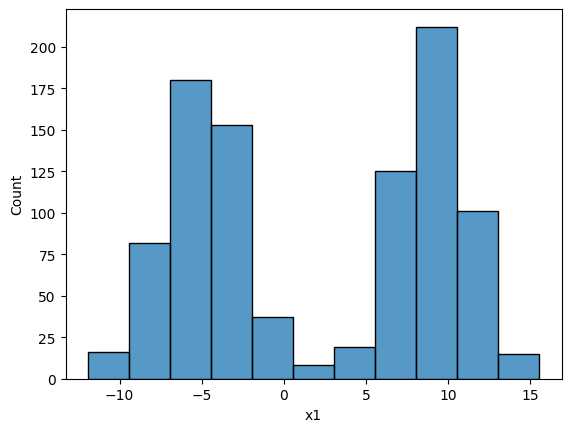

In [43]:
sns.histplot(data.x1)
plt.show()

Plot in the same figure the histogram of two variables



array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

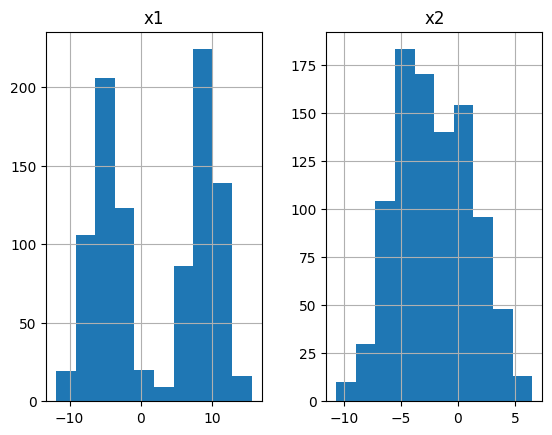

In [53]:
# Plot in the same figure the histogram of 2 variables

data.hist(['x1', 'x2'])

Based on these plots, provide a description of your data:

Your response here:

Plot the boxplot of one of the variables

<Axes: >

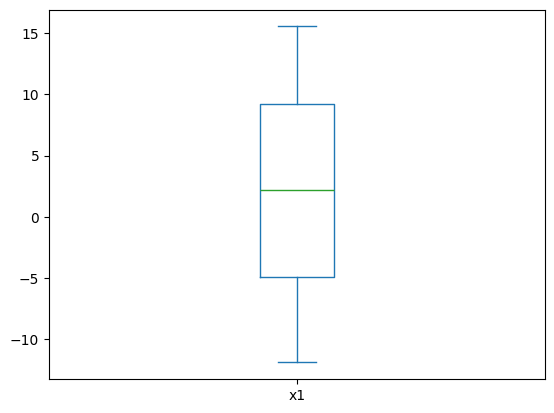

In [55]:
data['x1'].plot(kind='box')

Plot in the same figure the boxplot of two variables

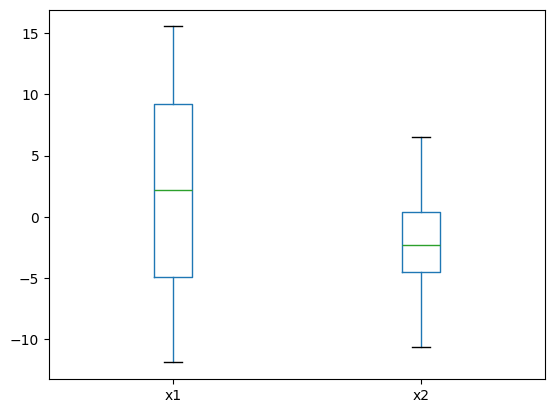

In [58]:
# Plot in the same figure the boxplot of 2 variables

data.boxplot(['x1', 'x2'])
plt.grid(False)

Based on these plots, provide a description of your data:

Your response here:

Plot the scatter plot between all pair of variables

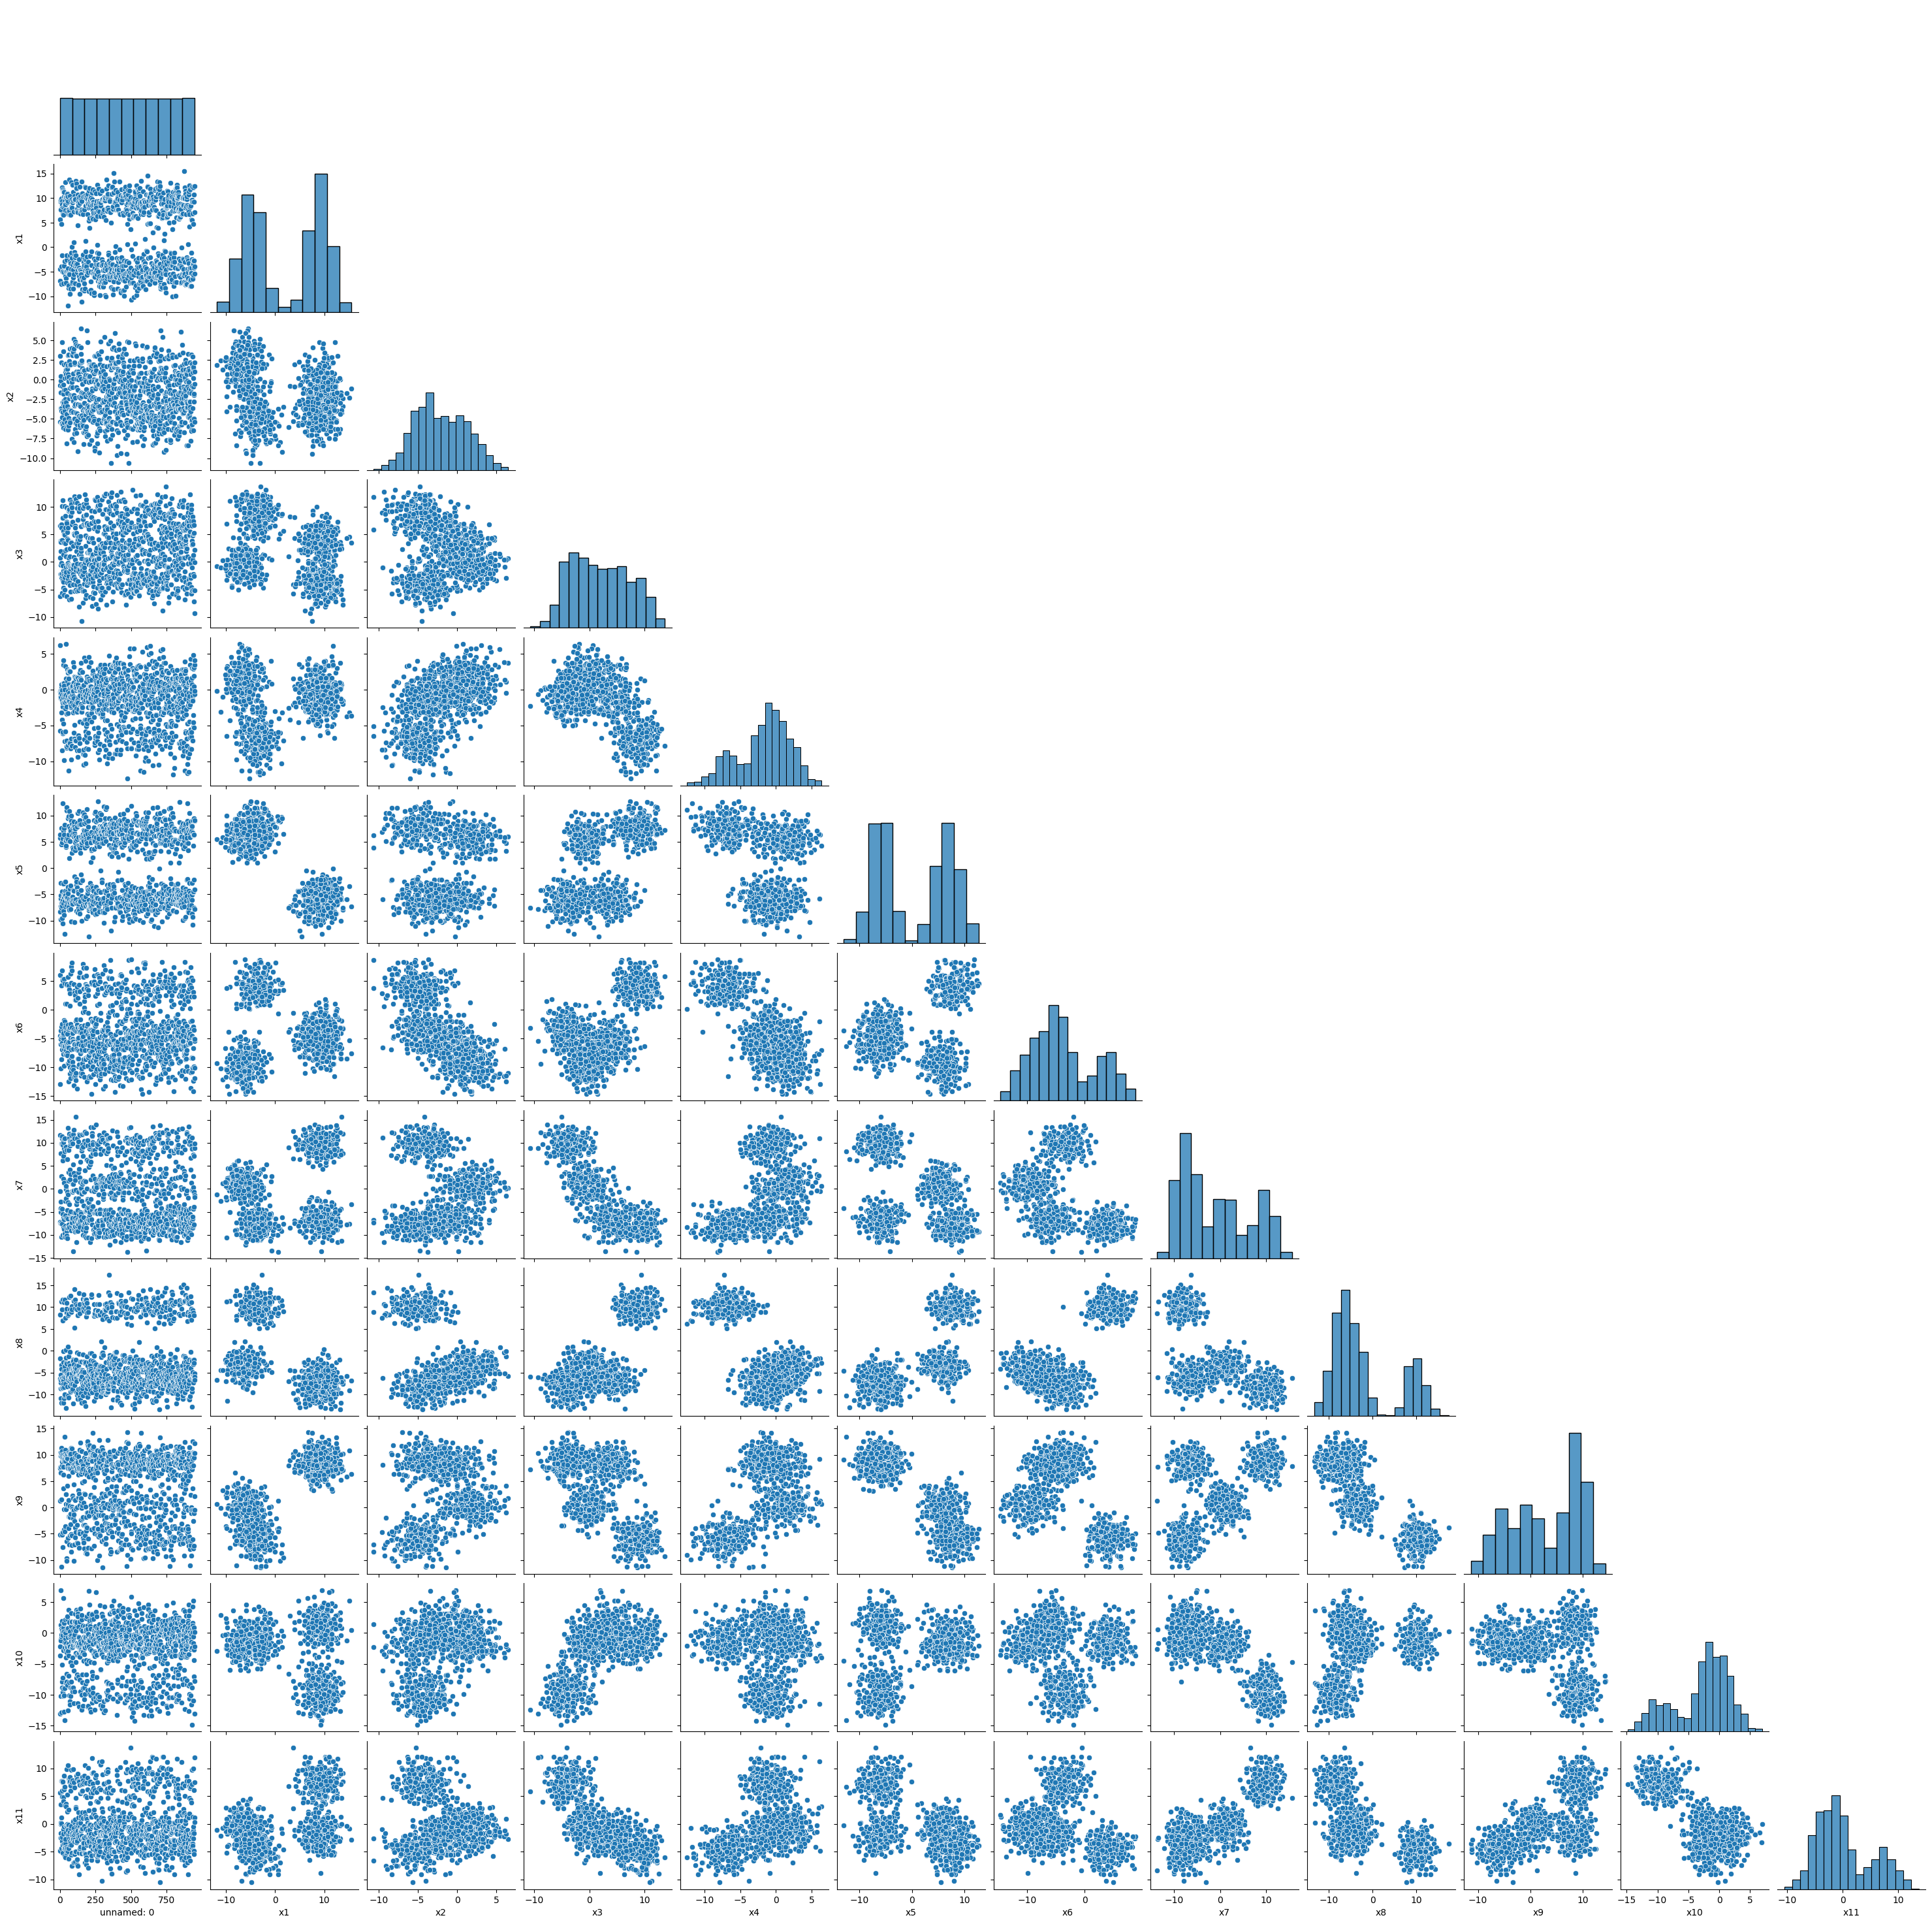

In [59]:
sns.pairplot(data=data, corner=True)

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

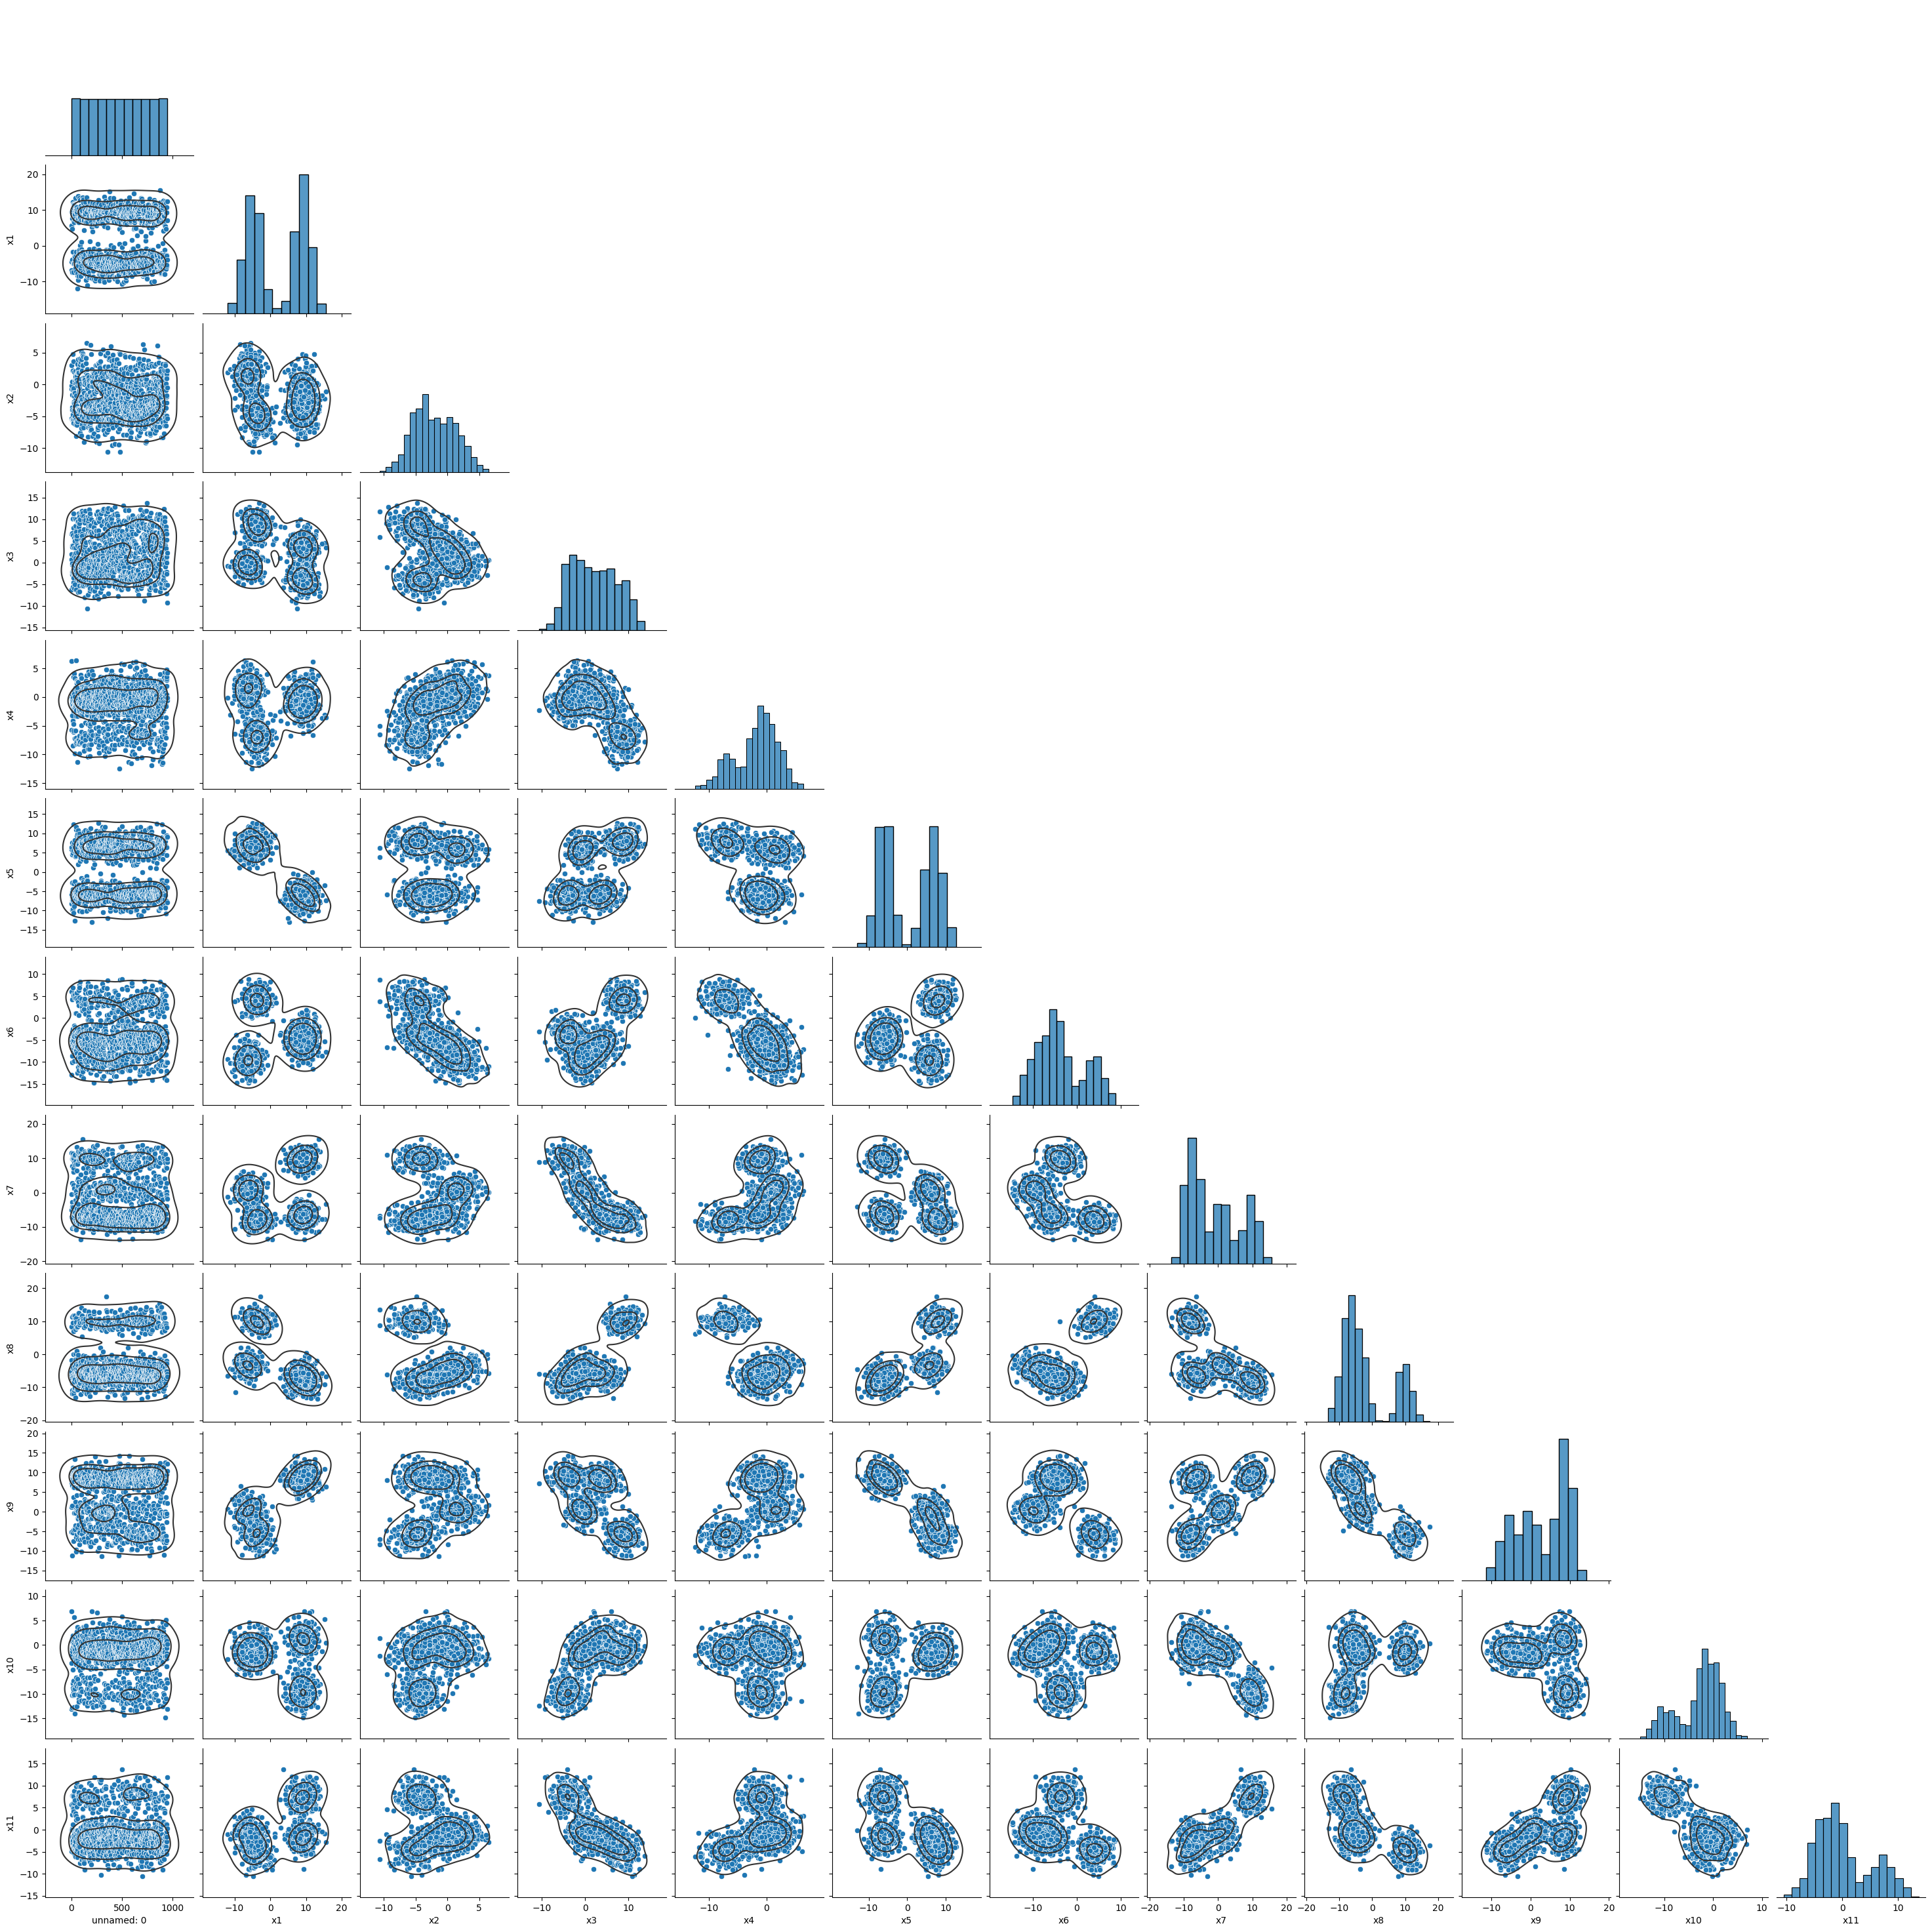

In [60]:
g = sns.pairplot(data=data, corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

Add to your dataset a column with the estimated cluster to each data point

In [11]:
# Add to your dataset a column with the estimated cluster to each data point

from sklearn.cluster import KMeans
points = data[['x1', 'x2']]
kmeans = KMeans(n_clusters=4).fit(points)
data['cluster'] = kmeans.labels_

data


Unnamed: 0         x1        x2        x3        x4        x5         x6  \
0             0   5.633670 -5.391909 -6.241326 -0.229762 -8.260464  -4.536947   
1             1  -4.446400 -0.721278  6.603646 -5.714566  5.806021   6.049225   
2             2  -6.839525  3.044584  0.696548  6.211317  6.389792 -12.908313   
3             3   9.526248 -0.146916  1.963917 -0.120648 -5.852763  -4.994799   
4             4   9.255847 -3.630274  3.852253 -0.321279 -5.246166  -6.001134   
..          ...        ...       ...       ...       ...       ...        ...   
943         943  -2.771917 -4.961003  5.305274 -5.269125  9.480316   2.301629   
944         944  -5.340026  0.988424 -0.044161  3.501821  9.008829 -11.945970   
945         945   7.129323 -0.512134 -9.284682 -0.612674 -7.818956  -5.410940   
946         946  -3.890029  2.195280  2.142936  4.145488  9.045849 -10.058868   
947         947  12.488619 -5.348293 -5.203342 -0.150297 -4.033159  -5.095279   

            x7        x8         x9        x10        x11        x12  cluster  
0    11.639031 -6.401420   7.431034 -13.103061   5.599357   2.320727        1  
1    -7.151839  8.332236  -5.197111  -2.119271  -4.773417   8.539217        2  
2    -0.473507 -1.799694   1.212426  -3.640382  -4.853807  -0.513765        2  
3    -5.117865 -5.422072   9.872737   6.955579  -0.068589   8.404701        3  
4    -2.819553 -7.291857   6.628099  -1.044710  -1.643675  12.696854        1  
..         ...       ...        ...        ...        ...        ...      ...  
943  -7.707240  8.107397  -7.270007  -4.363174  -5.496503   6.311762        0  
944  -1.369054 -5.216127  -0.434730  -2.164938   1.132761  -2.828424        2  
945   8.843861 -6.146677  10.371392 -13.027040  11.949634   0.239757        3  
946  -1.762334 -5.859115   2.113075   0.152033   0.319814   0.523829        2  
947   9.802600 -6.710035  12.193523  -7.781819   7.511375  -0.740103        1  

[948 rows x 14 columns]

Print the number associated to each cluster

In [6]:
# Print the number associated to each cluster

print("Número de elementos en cada cluster:\n" , data.cluster.value_counts())


Número de elementos en cada cluster:
 cluster
1    465
2    180
0    173
3    130
Name: count, dtype: int64


Print the centroids

In [10]:
# Print the centroids

print("Centroides:\n" , kmeans.cluster_centers_)




Centroides:
 [[ 8.79111912  0.19060447]
 [-5.05982836 -1.64241973]
 [10.82217797 -3.41224306]
 [ 6.64824626 -4.83548592]]


Print the intertia metric

In [11]:
# Pritnt the intertia metric

print("Inercia:\n" , kmeans.inertia_)



Inercia:
 11568.676299299601


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

In [ ]:
# Plot a scatter plot of your data using different colors for each cluster. Also plot the centroids
g = sns.pairplot(data=data, hue='cluster', corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.map_lower(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.show()

### Questions

Provides a detailed description of your results

Your response:

## d) Elbow plot

Compute the Elbow plot

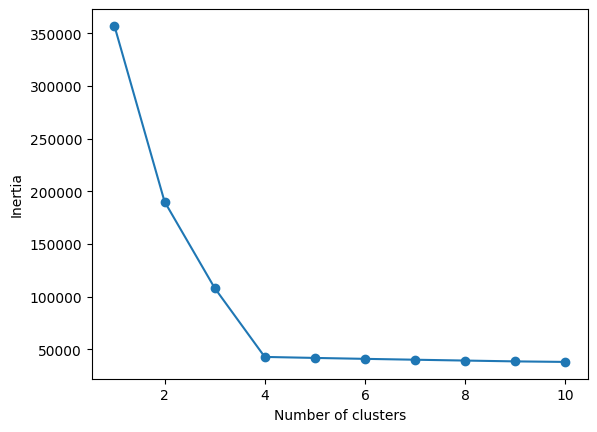

In [26]:
# Compute the elbow plot

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7', 'x8', 'x9', 'x10', 'x11']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



### Questions

What is the best number of clusters K? (argue your response)

Your response:


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [30]:
# Load the dataset from "sklearn.datasets"

from sklearn import datasets
datairis = datasets.load_iris()


2) Plot some of the observations (add in the title the label/digit of that obserbation)

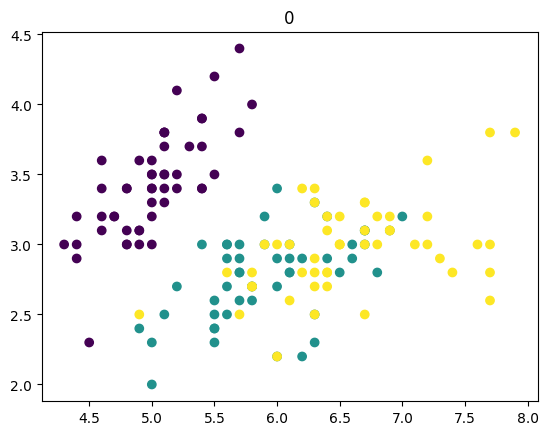

In [31]:
# Plot some of the observations (add in the title the label/digit of that observation)

plt.scatter(datairis.data[:, 0], datairis.data[:, 1], c=datairis.target)
plt.title("0")
plt.show()


3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [ ]:
# Do K means clustering in the following cases:

# KmeansAll: Using 64 variables/pixels/features

kmeansAll = KMeans(n_clusters=10).fit(datairis.data)

# Kmeans1row: Using only the 8 variables/pixels/features of the first row

kmeans1row = KMeans(n_clusters=4).fit(datairis.data[0].reshape(-1, 1))

# Kmeans4row: Using the 8 variables/pixels/features from the fourth row

kmeans4row = KMeans(n_clusters=4).fit(datairis.data[3].reshape(-1, 1))

# Kmeans8row: Using the 8 variables/pixels/features from the eighth row

kmeans8row = KMeans(n_clusters=4).fit(datairis.data[7].reshape(-1, 1))
print("KmeansAll:\n" , kmeansAll.labels_)
print("Kmeans1row:\n" , kmeans1row.labels_)
print("Kmeans4row:\n" , kmeans4row.labels_)
print("Kmeans8row:\n" , kmeans8row.labels_)




4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

In [ ]:
# Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

plt.scatter(datairis.data[:, 0], datairis.data[:, 1], c=kmeansAll.labels_)
plt.title("Real label: " + str(datairis.target[0]) + " Estimated label: " + str(kmeansAll.labels_[0]))
plt.show()

plt.scatter(datairis.data[:, 0], datairis.data[:, 1], c=kmeansAll.labels_)
plt.title("Real label: " + str(datairis.target[1]) + " Estimated label: " + str(kmeansAll.labels_[1]))
plt.show()

plt.scatter(datairis.data[:, 0], datairis.data[:, 1], c=kmeansAll.labels_)
plt.title("Real label: " + str(datairis.target[2]) + " Estimated label: " + str(kmeansAll.labels_[2]))
plt.show()

plt.scatter(datairis.data[:, 0], datairis.data[:, 1], c=kmeansAll.labels_)
plt.title("Real label: " + str(datairis.target[3]) + " Estimated label: " + str(kmeansAll.labels_[3]))
plt.show()

5) Compute the Elbow plot

Text(0, 0.5, 'Inertia')

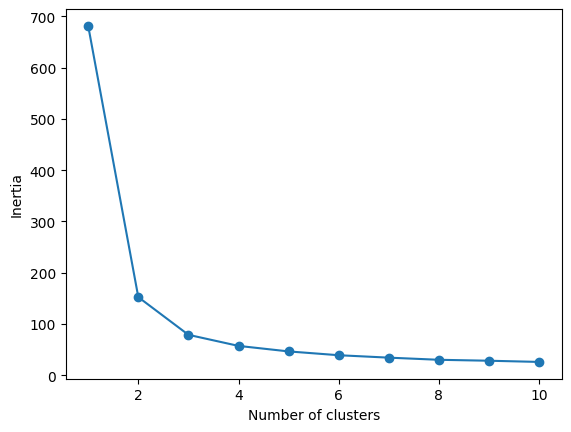

In [40]:
# Compute the elbow plot

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(datairis.data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')



### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [41]:
# Load the dataset from "sklearn.datasets"

from sklearn import datasets
datairis = datasets.load_iris()


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

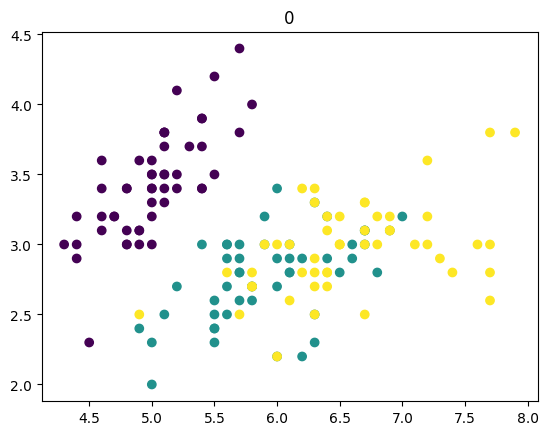

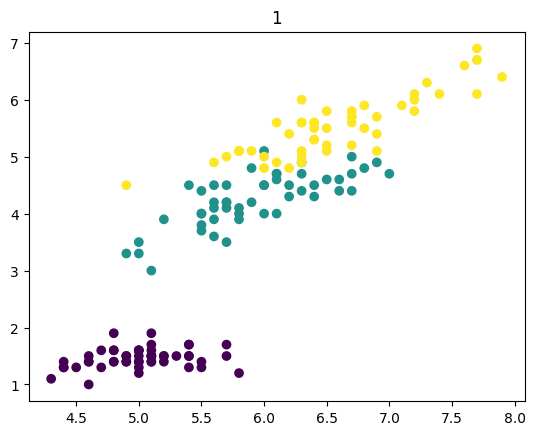

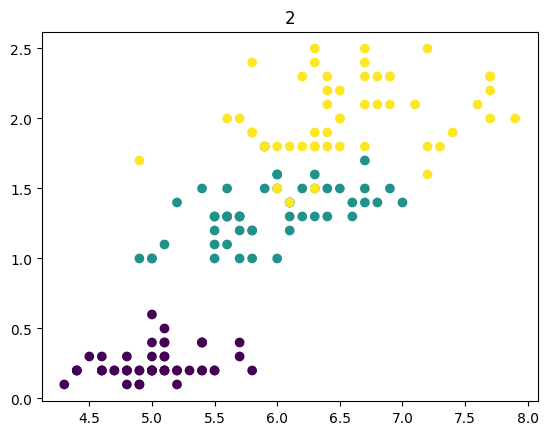

In [53]:
# Plot some of the observations (add in the title the label/digit of that observation)

plt.scatter(datairis.data[:, 0], datairis.data[:, 1], c=datairis.target)
plt.title("0")
plt.show()

plt.scatter(datairis.data[:, 0], datairis.data[:, 2], c=datairis.target)
plt.title("1")
plt.show()

plt.scatter(datairis.data[:, 0], datairis.data[:, 3], c=datairis.target)
plt.title("2")
plt.show()

3) Split the dataset in train and test

In [43]:
# Split the dataset in train and test

x = data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12']].values
y = data[['cluster']].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=0)

data["cluster"].unique()



array([1, 2, 3, 0], dtype=int32)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine

5) Make predictions (use the test set)

6) Compute performance metrics



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = data

x = df.drop(columns=["Unnamed: 0", "cluster"])
y = df["cluster"]

feature_sets = {
    "ClassifierAll": x, 
    "Classifier1col": x[["x1"]], 
    "Classifier4col": x[["x4"]], 
    "Classifier8col": x[["x8"]]
}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

results = {}

for name, features in feature_sets.items():
    x_train_subset = x_train[features.columns]
    x_test_subset = x_test[features.columns]

    model = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale"))
    model.fit(x_train_subset, y_train)

    y_pred = model.predict(x_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

print(results)




{'ClassifierAll': 0.968421052631579, 'Classifier1col': 0.6684210526315789, 'Classifier4col': 0.5894736842105263, 'Classifier8col': 0.7315789473684211}


### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Interpreta interacciones

Me siento lo suficientemente capaz de analizar una cantidad de datos brindados, utilizando las variables y observaciones brindadas para poder hacer un analisis de datos, hacer clasificacion y clustering con los mismos para poder determinar que datos pertencen a una clasificacion y asi poder generar y entrenar un modelo con una mayor precision

Construccion de Modelos

Me siento capaz de poder construir diferentes modelos calisifcatorios para poder obtener analizis y emparejamiento de datos cada vez mas precisos, permitiendo asi que con cada iteracion de entrenamiento del modelo, me permite tener un mejor entendimiento de los datos completos y por separado utilizando diferentes componentes del machine learning no supervisado